# Seaborn methods testing

---
## Data initialization
Testing seaborn methods using the dataset [mpg](https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv) from seaborn data exercises

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(rc={'figure.figsize' : (7,6)})
sns.set_style(style='whitegrid')

taxis_dataframe = pd.read_csv(r'data\taxis_dataframe.csv', parse_dates=['pickup', 'dropoff'])
taxis_dataframe.dropna(inplace=True)

In [2]:
taxis_dataframe

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [3]:
taxis_dataframe = taxis_dataframe.assign(trip_duration_minute = (taxis_dataframe['dropoff'] - taxis_dataframe['pickup']).dt.seconds//60)

In [4]:
# Columns rearrange
taxis_dataframe = taxis_dataframe[
    ['pickup', 
    'dropoff', 
    'trip_duration_minute', 
    'distance', 
    'fare', 
    'tip', 
    'tolls', 
    'total', 
    'color', 
    'payment', 
    'pickup_zone', 
    'dropoff_zone', 
    'pickup_borough', 
    'dropoff_borough', 
    ]
]


In [5]:
taxis_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pickup                6341 non-null   datetime64[ns]
 1   dropoff               6341 non-null   datetime64[ns]
 2   trip_duration_minute  6341 non-null   int64         
 3   distance              6341 non-null   float64       
 4   fare                  6341 non-null   float64       
 5   tip                   6341 non-null   float64       
 6   tolls                 6341 non-null   float64       
 7   total                 6341 non-null   float64       
 8   color                 6341 non-null   object        
 9   payment               6341 non-null   object        
 10  pickup_zone           6341 non-null   object        
 11  dropoff_zone          6341 non-null   object        
 12  pickup_borough        6341 non-null   object        
 13  dropoff_borough   

In [6]:
taxis_dataframe

,pickup,dropoff,trip_duration_minute,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,6,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,7,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,7,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,25,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,9,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,3,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,56,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,19,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,5,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


---
## Data visualization with seaborn.histplot

### Visualization of univariate

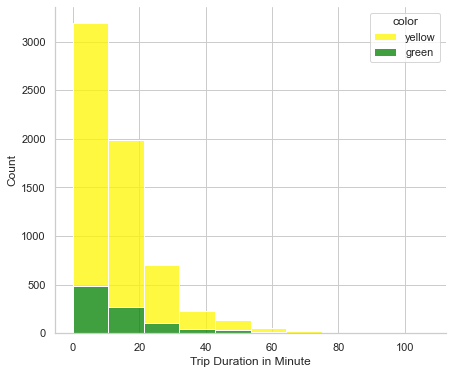

In [7]:
palette = ['#fff600', '#008000']
sns.histplot(
    x='trip_duration_minute',
    hue='color',
    palette=palette,
    multiple='stack',
    bins=10,
    data=taxis_dataframe,
)
plt.xlabel('Trip Duration in Minute');
sns.despine()

### Visualization of bivariate 

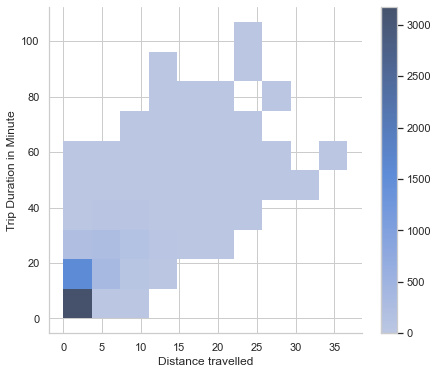

In [8]:
sns.histplot(
    x='distance',
    y='trip_duration_minute',
    cbar=True,
    bins=10,
    data=taxis_dataframe,
)

plt.xlabel('Distance travelled')
plt.ylabel('Trip Duration in Minute')
sns.despine()

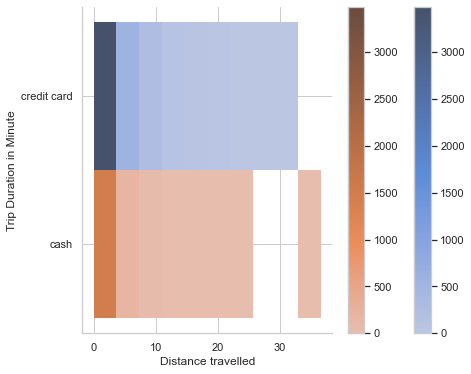

In [9]:
sns.histplot(
    x='distance',
    y='payment',
    hue='payment',
    legend=False,
    cbar=True,
    bins=10,
    data=taxis_dataframe,
)

plt.xlabel('Distance travelled')
plt.ylabel('Trip Duration in Minute')
sns.despine()

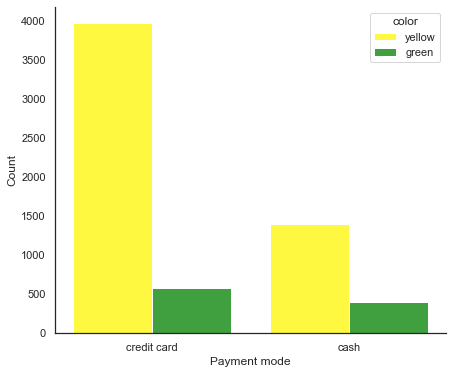

In [10]:
sns.set_style('white')

sns.histplot(
    x='payment',
    hue='color',
    palette=palette,
    multiple='dodge',
    legend=True,
    shrink=0.8,
    data=taxis_dataframe,
)

plt.xlabel('Payment mode')
sns.despine()

---
## Data visualization with seaborn.boxplot

In [ ]:
trip_duration_filter = taxis_dataframe['trip_duration_minute'] <= 10
taxis_dataframe = taxis_dataframe.assign(trip_under_10 = trip_duration_filter)

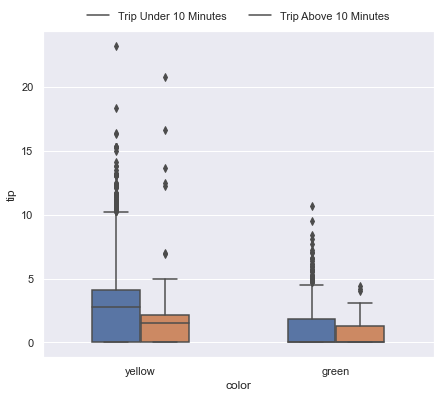

In [57]:
sns.set_style('darkgrid')
ax = sns.boxplot(
    x='color',
    y='tip',
    hue='trip_under_10',
    width=.5,
    data=taxis_dataframe,
)

ax.legend(['Trip Under 10 Minutes', 'Trip Above 10 Minutes'], loc='lower center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)
# plt.axhline(1500, c='black');
# plt.axvline(30,c='black')

---
## Data visualization with seaborn.ecdfplot

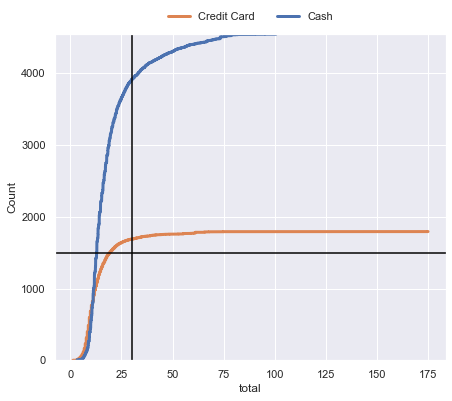

In [12]:
sns.set_style('darkgrid')
ax = sns.ecdfplot(
    x='total',
    hue='payment',
    stat='count',
    lw=3,
    data=taxis_dataframe,
)

ax.legend(['Credit Card', 'Cash'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=3, title=None, frameon=False,)
plt.axhline(1500, c='black');
plt.axvline(30,c='black')

---
## Data visualization with seaborn.replot

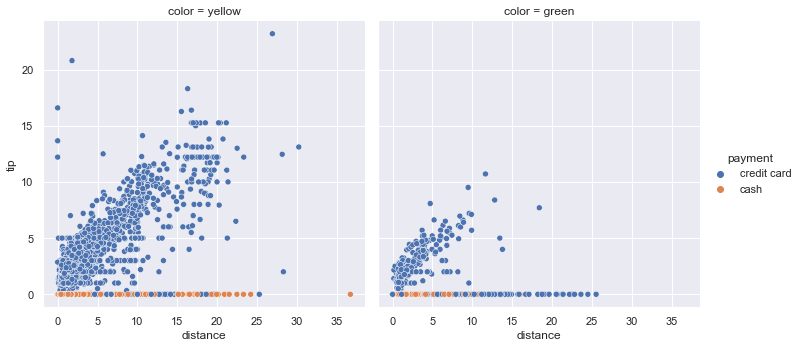

In [13]:
sns.relplot(
    x='distance',
    y='tip',
    col='color',
    hue='payment',
    kind='scatter',
    data=taxis_dataframe,
);

---
## Data visualization with seaborn.kdeplot

### Visualization with univariate

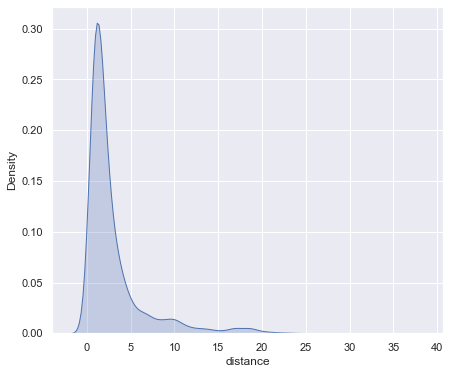

In [14]:
sns.kdeplot(
    data=taxis_dataframe['distance'],
    shade=True,
    # bw_adjust=.3,
);

### Visualization with bivariate

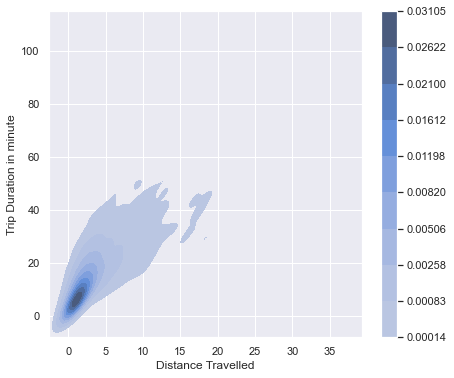

In [15]:
sns.kdeplot(
    x='distance',
    y='trip_duration_minute',
    shade=True,
    thresh=0.05,
    cbar=True,
    data=taxis_dataframe,
)

plt.ylabel('Trip Duration in minute')
plt.xlabel('Distance Travelled');
